<a href="https://colab.research.google.com/github/aksanaboo/sephora/blob/main/SephoraEDApart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
# Install TextBlob library
!pip install textblob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#datasets
product = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/product_info.csv')
review_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_0-250.csv')
review_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_250-500.csv')
review_3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_500-750.csv')
review_4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_750-1250.csv')
review_5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_1250-end.csv')

<ipython-input-3-e4867818210a>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_0-250.csv')
<ipython-input-3-e4867818210a>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review_4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_750-1250.csv')
<ipython-input-3-e4867818210a>:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review_5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_1250-end.csv')


In [4]:
review_1.shape

(602130, 19)

In [5]:
df = [review_1,review_2,review_3,review_4,review_5]

In [6]:
#concat all reviews into one df
review = pd.concat(df,axis=0)

In [7]:
review.shape

(1094411, 19)

In [8]:
review.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [9]:
#check for missing values
review.isnull().sum()

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              167988
helpfulness                 561592
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
review_title                310654
skin_tone                   170539
eye_color                   209628
skin_type                   111557
hair_color                  226768
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

In [10]:
#check for duplicates
review.duplicated().sum()

0

In [11]:
rev = review[['product_name','brand_name','review_text','review_title','price_usd']]

In [12]:
rev.isnull().sum()

product_name         0
brand_name           0
review_text       1444
review_title    310654
price_usd            0
dtype: int64

In [13]:
rev = rev.dropna(subset=['review_text'])
rev = rev.reset_index(drop=True)

In [14]:
rev.fillna(' ', inplace=True)

In [15]:
rev.isnull().sum()

product_name    0
brand_name      0
review_text     0
review_title    0
price_usd       0
dtype: int64

In [16]:
rev.shape

(1092967, 5)

In [17]:
rev.head()

,product_name,brand_name,review_text,review_title,price_usd
0,Gentle Hydra-Gel Face Cleanser,NUDESTIX,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,19.0
1,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,I bought this lip mask after reading the revie...,Disappointed,24.0
2,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,My review title says it all! I get so excited ...,New Favorite Routine,24.0
3,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,I’ve always loved this formula for a long time...,Can't go wrong with any of them,24.0
4,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,"If you have dry cracked lips, this is a must h...",A must have !!!,24.0


In [18]:
rev['post'] = rev['review_text'] + rev['review_title']

In [19]:
rev.head()

,product_name,brand_name,review_text,review_title,price_usd,post
0,Gentle Hydra-Gel Face Cleanser,NUDESTIX,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,19.0,I use this with the Nudestix “Citrus Clean Bal...
1,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,I bought this lip mask after reading the revie...,Disappointed,24.0,I bought this lip mask after reading the revie...
2,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,My review title says it all! I get so excited ...,New Favorite Routine,24.0,My review title says it all! I get so excited ...
3,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,I’ve always loved this formula for a long time...,Can't go wrong with any of them,24.0,I’ve always loved this formula for a long time...
4,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,"If you have dry cracked lips, this is a must h...",A must have !!!,24.0,"If you have dry cracked lips, this is a must h..."


In [20]:
##Sentiment Analysis
!pip install textblob

In [21]:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
rev["post"] = rev["post"].apply(clean)

In [22]:
rev.head()

,product_name,brand_name,review_text,review_title,price_usd,post
0,Gentle Hydra-Gel Face Cleanser,NUDESTIX,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,19.0,use nudestix “citrus clean balm makeup melt“ ...
1,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,I bought this lip mask after reading the revie...,Disappointed,24.0,bought lip mask read review hype unfortun meet...
2,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,My review title says it all! I get so excited ...,New Favorite Routine,24.0,review titl say get excit get bed appli lip ma...
3,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,I’ve always loved this formula for a long time...,Can't go wrong with any of them,24.0,i'v alway love formula long time honest don't ...
4,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,"If you have dry cracked lips, this is a must h...",A must have !!!,24.0,dri crack lip must week use learn alway bedsid...


In [23]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
rev["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in rev["post"]]
rev["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in rev["post"]]
rev["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in rev["post"]]
sentiment = rev[["post", "Positive", "Negative", "Neutral"]]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [24]:
rev.head()

,product_name,brand_name,review_text,review_title,price_usd,post,Positive,Negative,Neutral
0,Gentle Hydra-Gel Face Cleanser,NUDESTIX,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,19.0,use nudestix “citrus clean balm makeup melt“ ...,0.181,0.040,0.779
1,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,I bought this lip mask after reading the revie...,Disappointed,24.0,bought lip mask read review hype unfortun meet...,0.162,0.000,0.838
2,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,My review title says it all! I get so excited ...,New Favorite Routine,24.0,review titl say get excit get bed appli lip ma...,0.075,0.097,0.829
3,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,I’ve always loved this formula for a long time...,Can't go wrong with any of them,24.0,i'v alway love formula long time honest don't ...,0.379,0.074,0.548
4,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,"If you have dry cracked lips, this is a must h...",A must have !!!,24.0,dri crack lip must week use learn alway bedsid...,0.095,0.000,0.905


In [25]:
# overall review score on Sephora
Positive = sum(sentiment['Positive'])
Negative = sum(sentiment['Negative'])
Neutral = sum(sentiment['Neutral'])

In [26]:
sentiments = ['Positive', 'Negative', 'Neutral']
values = [Positive, Negative, Neutral]

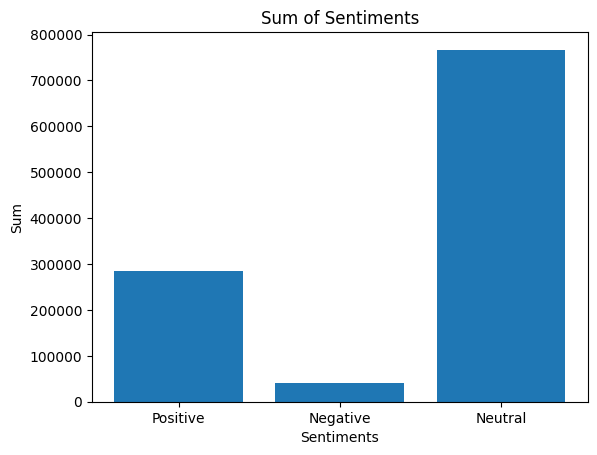

In [27]:
plt.bar(sentiments, values)
plt.xlabel('Sentiments')
plt.ylabel('Sum')
plt.title('Sum of Sentiments')
plt.show()

In [28]:
# Sentiment Analysis using text blob

In [29]:
from textblob import TextBlob

# Apply sentiment analysis
rev['sentiment'] = rev['post'].apply(lambda x: TextBlob(x).sentiment.polarity)

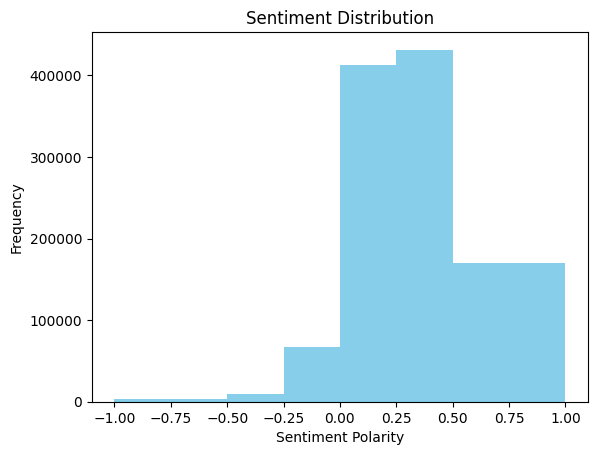

In [30]:
# Visualize sentiment distribution
plt.hist(rev['sentiment'], bins=[-1, -0.5,-0.25, 0, 0.25, 0.5, 1], color='skyblue')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()

In [31]:
rev.head()

,product_name,brand_name,review_text,review_title,price_usd,post,Positive,Negative,Neutral,sentiment
0,Gentle Hydra-Gel Face Cleanser,NUDESTIX,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,19.0,use nudestix “citrus clean balm makeup melt“ ...,0.181,0.040,0.779,-0.08000
1,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,I bought this lip mask after reading the revie...,Disappointed,24.0,bought lip mask read review hype unfortun meet...,0.162,0.000,0.838,0.50000
2,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,My review title says it all! I get so excited ...,New Favorite Routine,24.0,review titl say get excit get bed appli lip ma...,0.075,0.097,0.829,0.00000
3,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,I’ve always loved this formula for a long time...,Can't go wrong with any of them,24.0,i'v alway love formula long time honest don't ...,0.379,0.074,0.548,0.23125
4,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,"If you have dry cracked lips, this is a must h...",A must have !!!,24.0,dri crack lip must week use learn alway bedsid...,0.095,0.000,0.905,0.12500


In [32]:
# Analyze sentiment results
positive_reviews =rev[rev['sentiment'] > 0]
negative_reviews = rev[rev['sentiment'] < 0]
neutral_reviews = rev[rev['sentiment'] == 0]

In [33]:
neutral_reviews.head()

,product_name,brand_name,review_text,review_title,price_usd,post,Positive,Negative,Neutral,sentiment
2,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,My review title says it all! I get so excited ...,New Favorite Routine,24.0,review titl say get excit get bed appli lip ma...,0.075,0.097,0.829,0.0
38,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,I used to like this product until I found out ...,HAS BHT,24.0,use like product found bht hazard pleas resear...,0.143,0.000,0.857,0.0
40,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,Obsessed with this! The first few days I wasn’...,,24.0,obsess first day wasn't see ton result use con...,0.068,0.064,0.868,0.0
56,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,This product is a DEFINITE must for chapped li...,Life saver,24.0,product definit must chap lip get realli chap ...,0.160,0.140,0.700,0.0
62,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,Je ne comprenais tellement pas pourquoi tout l...,"OMG oui, oui, oui tout le temps",24.0,je ne comprenai tellement pas pourquoi tout le...,0.000,0.062,0.938,0.0


In [34]:
def determine_sentiment(row):
    if row['Positive'] > row['Negative'] and row['Positive'] > row['Neutral']:
        return 'Positive 😊'
    elif row['Negative'] > row['Positive'] and row['Negative'] > row['Neutral']:
        return 'Negative 😠'
    else:
        return 'Neutral 🙂'

In [35]:
rev['sentiment_overall'] = rev.apply(determine_sentiment, axis=1)

In [36]:
rev.head()

,product_name,brand_name,review_text,review_title,price_usd,post,Positive,Negative,Neutral,sentiment,sentiment_overall
0,Gentle Hydra-Gel Face Cleanser,NUDESTIX,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,19.0,use nudestix “citrus clean balm makeup melt“ ...,0.181,0.040,0.779,-0.08000,Neutral 🙂
1,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,I bought this lip mask after reading the revie...,Disappointed,24.0,bought lip mask read review hype unfortun meet...,0.162,0.000,0.838,0.50000,Neutral 🙂
2,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,My review title says it all! I get so excited ...,New Favorite Routine,24.0,review titl say get excit get bed appli lip ma...,0.075,0.097,0.829,0.00000,Neutral 🙂
3,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,I’ve always loved this formula for a long time...,Can't go wrong with any of them,24.0,i'v alway love formula long time honest don't ...,0.379,0.074,0.548,0.23125,Neutral 🙂
4,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,"If you have dry cracked lips, this is a must h...",A must have !!!,24.0,dri crack lip must week use learn alway bedsid...,0.095,0.000,0.905,0.12500,Neutral 🙂


In [37]:
rev.sentiment_overall.value_counts()

Neutral 🙂     1022516
Positive 😊      69447
Negative 😠       1004
Name: sentiment_overall, dtype: int64

In [38]:
# Top 30 products/brands with most amount of reviews

In [39]:
top_product = review['product_name'].value_counts().reset_index()

In [40]:
top_product.rename(columns={'index':'product_name','product_name':'Count'},inplace=True)

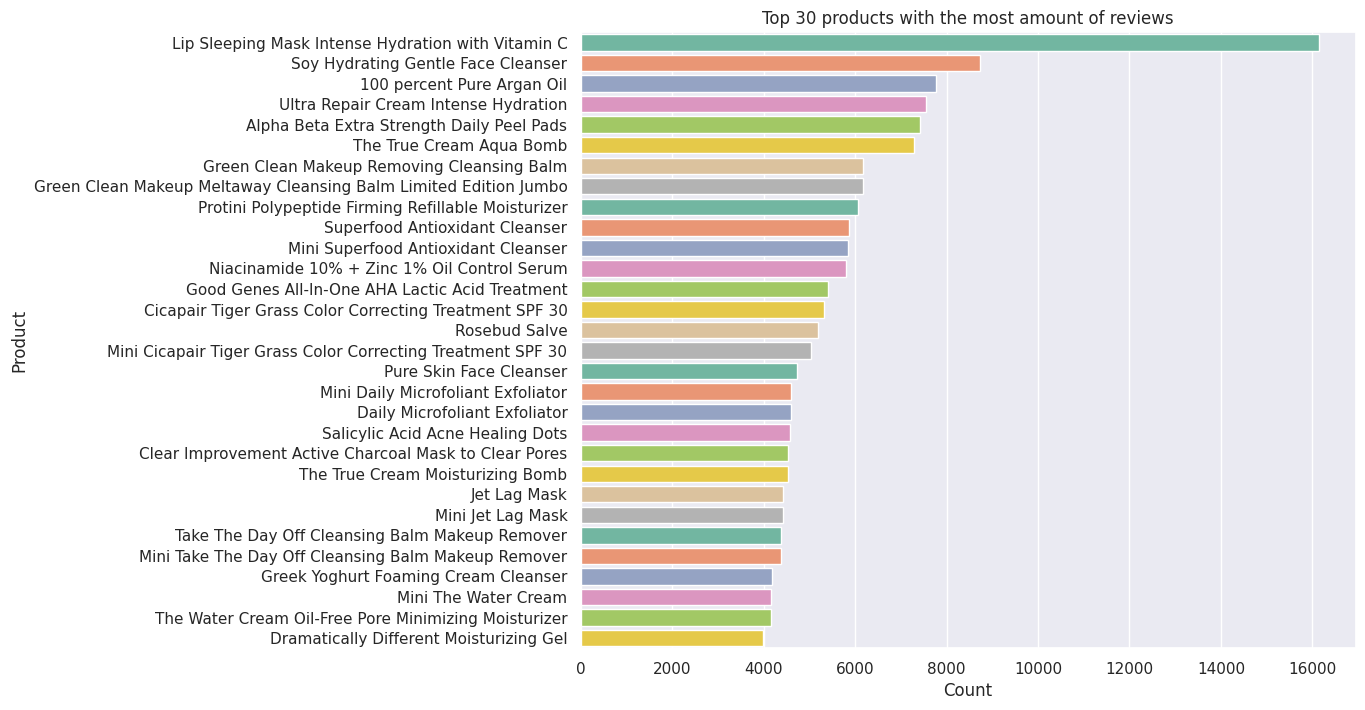

In [41]:
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
sns.barplot(data=top_product,x=top_product['Count'][:30],y=top_product['product_name'][:30],palette='Set2')
plt.xlabel('Count')
plt.ylabel('Product')
plt.title('Top 30 products with the most amount of reviews')
plt.show()

In [42]:
top_brand = review['brand_name'].value_counts().reset_index()

In [43]:
top_brand.rename(columns={'index':'brand_name','brand_name':'Count'},inplace=True)

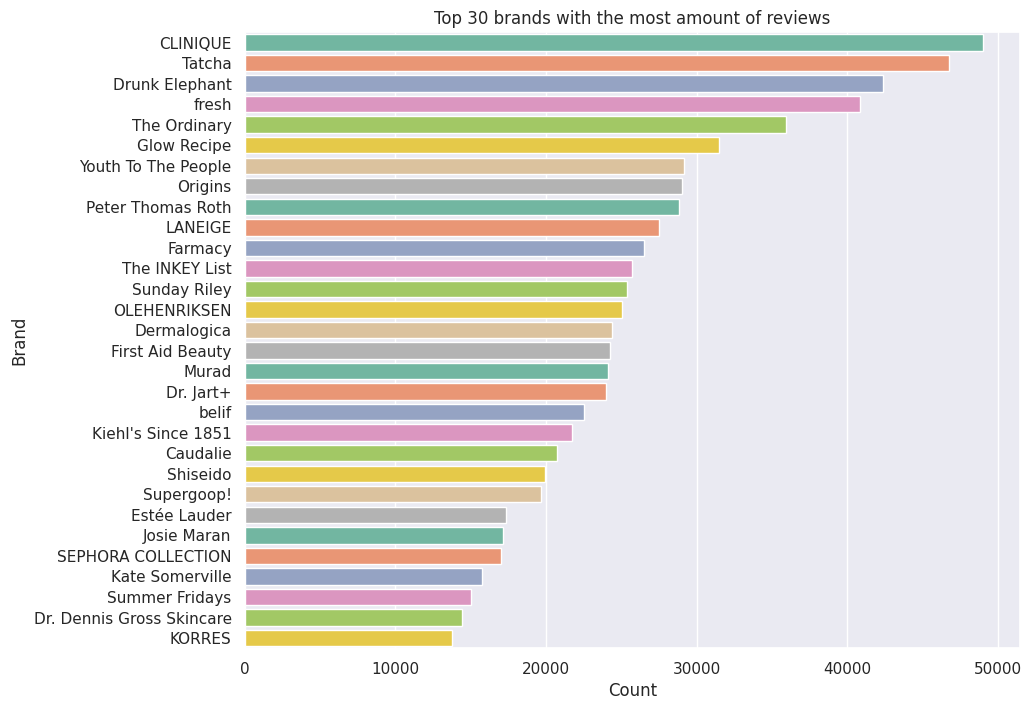

In [44]:
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
sns.barplot(data=top_brand,x=top_brand['Count'][:30],y=top_brand['brand_name'][:30],palette='Set2')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.title('Top 30 brands with the most amount of reviews')
plt.show()

In [45]:
##Look at a specific Brand
# CLINIQUE

In [46]:
clinique = rev['brand_name'] == 'CLINIQUE'

In [47]:
clinique = rev[clinique]

In [48]:
#sentiment around clinique products

In [49]:
clinique.head()

,product_name,brand_name,review_text,review_title,price_usd,post,Positive,Negative,Neutral,sentiment,sentiment_overall
147848,Take The Day Off Cleansing Balm Makeup Remover,CLINIQUE,I love this stuff. I got it as a sample then b...,HG makeup remover,38.0,love stuff got sampl bought full size make tak...,0.244,0.0,0.756,0.425000,Neutral 🙂
147849,Take The Day Off Cleansing Balm Makeup Remover,CLINIQUE,"I’ve tried a few cleansing balms and, while I ...",Great cleansing balm for sensitive skin!,38.0,i'v tri cleans balm like alway bit fragranc wo...,0.088,0.0,0.912,0.250000,Neutral 🙂
147850,Take The Day Off Cleansing Balm Makeup Remover,CLINIQUE,Felt like removing make up took too longWould ...,,38.0,felt like remov make took longwould rather use...,0.200,0.0,0.800,0.000000,Neutral 🙂
147851,Take The Day Off Cleansing Balm Makeup Remover,CLINIQUE,Love this to double cleanse. It’s unscented an...,A great oil based makeup remover,38.0,love doubl cleans it unscent smooth textur rem...,0.217,0.0,0.783,0.241667,Neutral 🙂
147852,Take The Day Off Cleansing Balm Makeup Remover,CLINIQUE,Best and most gentle remover! Takes off cakey ...,Remover of ill Intent,38.0,best gentl remov take cakey makeup without str...,0.421,0.0,0.579,0.250000,Neutral 🙂


In [50]:
clinique

,product_name,brand_name,review_text,review_title,price_usd,post,Positive,Negative,Neutral,sentiment,sentiment_overall
147848,Take The Day Off Cleansing Balm Makeup Remover,CLINIQUE,I love this stuff. I got it as a sample then b...,HG makeup remover,38.0,love stuff got sampl bought full size make tak...,0.244,0.000,0.756,0.425000,Neutral 🙂
147849,Take The Day Off Cleansing Balm Makeup Remover,CLINIQUE,"I’ve tried a few cleansing balms and, while I ...",Great cleansing balm for sensitive skin!,38.0,i'v tri cleans balm like alway bit fragranc wo...,0.088,0.000,0.912,0.250000,Neutral 🙂
147850,Take The Day Off Cleansing Balm Makeup Remover,CLINIQUE,Felt like removing make up took too longWould ...,,38.0,felt like remov make took longwould rather use...,0.200,0.000,0.800,0.000000,Neutral 🙂
147851,Take The Day Off Cleansing Balm Makeup Remover,CLINIQUE,Love this to double cleanse. It’s unscented an...,A great oil based makeup remover,38.0,love doubl cleans it unscent smooth textur rem...,0.217,0.000,0.783,0.241667,Neutral 🙂
147852,Take The Day Off Cleansing Balm Makeup Remover,CLINIQUE,Best and most gentle remover! Takes off cakey ...,Remover of ill Intent,38.0,best gentl remov take cakey makeup without str...,0.421,0.000,0.579,0.250000,Neutral 🙂
...,...,...,...,...,...,...,...,...,...,...,...
1092799,Repairwear Laser Focus Line Smoothing Cream Br...,CLINIQUE,Out of the dozens of moisturizers that I’ve tr...,My Go-To Moisturizer,53.0,dozen moistur i'v tri repairwear laser focus f...,0.034,0.000,0.966,0.133838,Neutral 🙂
1092800,Repairwear Laser Focus Line Smoothing Cream Br...,CLINIQUE,I haven been using Clinique for 15 years and h...,Great Daily Moisturizer,53.0,use cliniqu year reach yet anoth stage life r...,0.113,0.000,0.887,0.196131,Neutral 🙂
1092801,Repairwear Laser Focus Line Smoothing Cream Br...,CLINIQUE,This cream sat on the top of my skin (didn’t s...,Awful night cream,53.0,cream sat top skin didn't seep rub creat grain...,0.110,0.069,0.821,0.140625,Neutral 🙂
1092878,3 Step Intro Kit Type II,CLINIQUE,It’s terrible . After this lotion my face was ...,Not recommend to you,21.0,it terribl lotion face red alcohol recommend,0.294,0.000,0.706,0.000000,Neutral 🙂


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128578 (\N{SLIGHTLY SMILING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


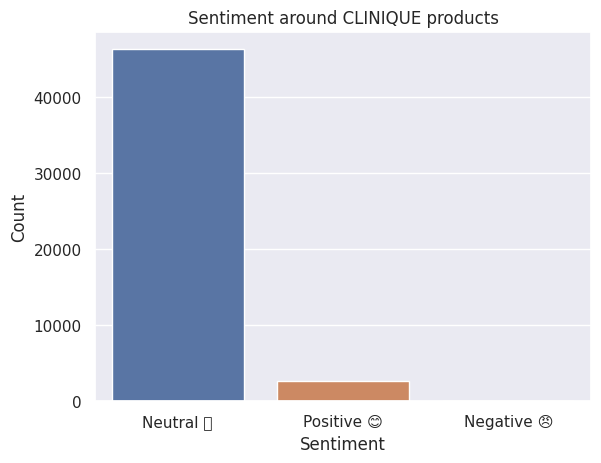

In [51]:
sns.set(style='darkgrid')
sns.countplot(data=clinique,x=clinique['sentiment_overall'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment around CLINIQUE products')
plt.show()

In [52]:
clinique['sentiment_overall'].value_counts()

Neutral 🙂     46264
Positive 😊     2678
Negative 😠       35
Name: sentiment_overall, dtype: int64

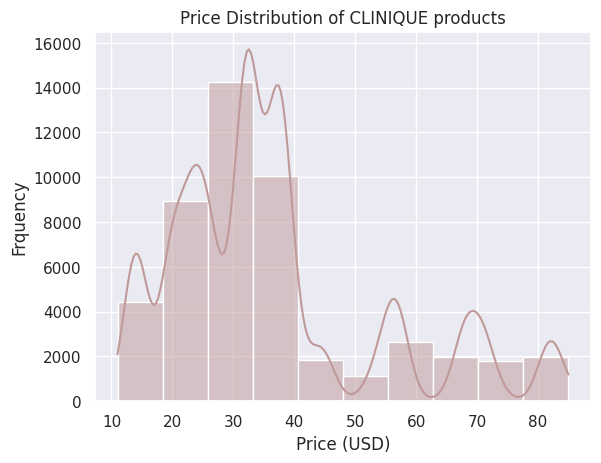

In [53]:
# CLINIQUE products price distribution
sns.set(style='darkgrid')
sns.histplot(data=clinique,x=clinique['price_usd'],kde=True,bins=10,color='#c09999')
plt.xlabel('Price (USD)')
plt.ylabel('Frquency')
plt.title('Price Distribution of CLINIQUE products')
plt.show()

In [54]:
clinique_pos = (rev['brand_name'] == 'CLINIQUE') & (rev['sentiment_overall'] == 'Positive 😊')

In [55]:
clinique_pos = rev[clinique_pos]

In [64]:
clinique_pos.shape

(2678, 11)

In [56]:
#Top 10 Positive Products from CLINIQUE
tmp = clinique_pos['product_name'].value_counts().reset_index()

In [57]:
tmp.rename(columns={'index':'product_name','product_name':'Count'},inplace=True)

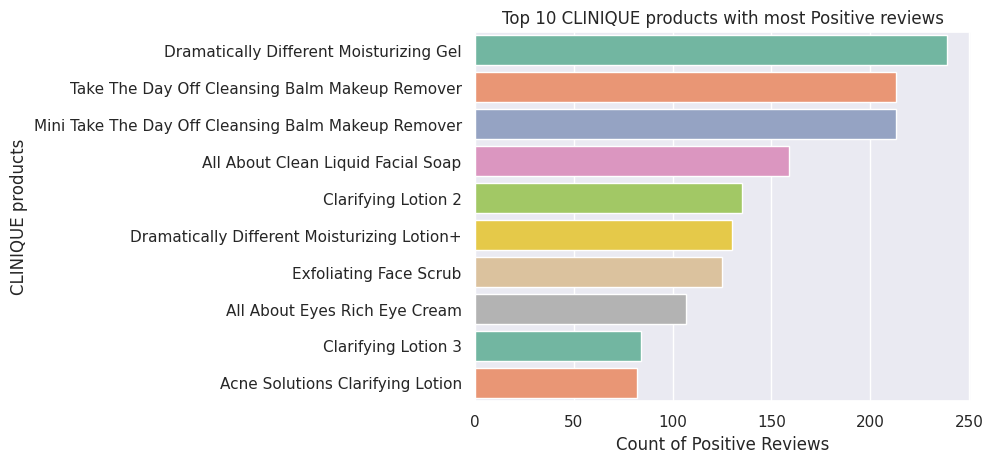

In [58]:
sns.set(style='darkgrid')
sns.barplot(data=tmp,x=tmp['Count'][:10],y=tmp['product_name'][:10],palette='Set2')
plt.xlabel('Count of Positive Reviews')
plt.ylabel('CLINIQUE products')
plt.title('Top 10 CLINIQUE products with most Positive reviews')
plt.show()

In [59]:
clinique_neg = (rev['brand_name'] == 'CLINIQUE') & (rev['sentiment_overall'] == 'Negative 😠')

In [60]:
clinique_neg = rev[clinique_neg]

In [61]:
#Top 10 Negative Products from CLINIQUE
tmp2 = clinique_neg['product_name'].value_counts().reset_index()

In [69]:
tmp2.rename(columns={'index':'product_name','product_name':'Count'},inplace=True)

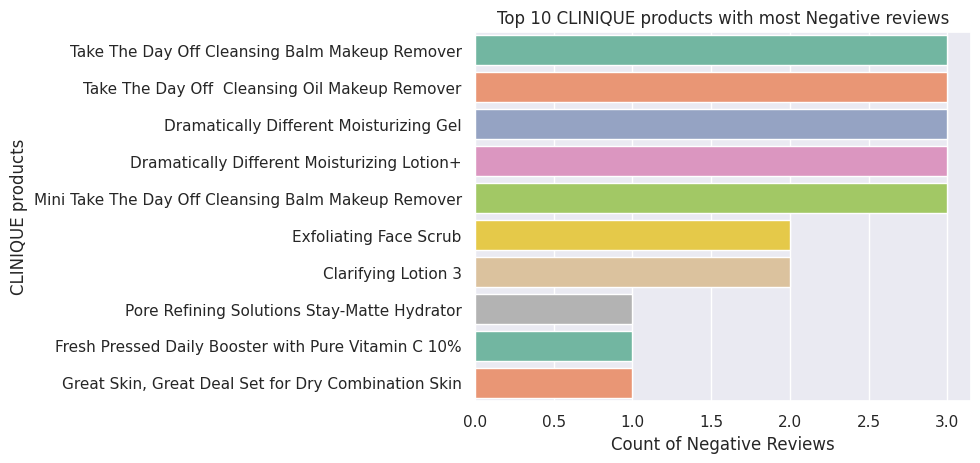

In [70]:
sns.set(style='darkgrid')
sns.barplot(data=tmp,x=tmp2['Count'][:10],y=tmp2['product_name'][:10],palette='Set2')
plt.xlabel('Count of Negative Reviews')
plt.ylabel('CLINIQUE products')
plt.title('Top 10 CLINIQUE products with most Negative reviews')
plt.show()